In [2]:
import os
import pdfplumber

### Two major formats

Let's start with the friendlier one

In [5]:
pdf = pdfplumber.open(os.path.expanduser("~/data/texas_air/tceq/pdf/5327403.pdf"))
len(pdf.pages)

1

In [6]:
pdf.pages[0].extract_table()

[['Emission Point No.\n(1)',
  'Source Name (2)',
  'Air Contaminant\nName (3)',
  'Emission Rates (7)',
  None],
 ['', '', '', 'lbs/hour', 'TPY (4)'],
 ['1', 'Primary Crusher (5)', 'PM', '0.01', '0.01'],
 [None, None, 'PM\n10', '0.01', '0.01'],
 [None, None, 'PM\n2.5', '0.01', '0.01'],
 ['2', 'Screen (5)', 'PM', '0.06', '0.07'],
 [None, None, 'PM\n10', '0.02', '0.03'],
 [None, None, 'PM\n2.5', '0.01', '0.01'],
 ['3', 'Material Handling (5)', 'PM', '0.15', '0.17'],
 [None, None, 'PM\n10', '0.05', '0.06'],
 [None, None, 'PM\n2.5', '0.02', '0.02'],
 ['4', 'Stockpiles (5)(6)', 'PM', '--', '0.46'],
 [None, None, 'PM\n10', '--', '0.23'],
 [None, None, 'PM\n2.5', '--', '0.04']]

### Second major format

This one seems a bit older and is not well formatted

In [74]:
pdf = pdfplumber.open(os.path.expanduser("~/data/texas_air/AIR NSR_xPrimaryID-18257_Permits_Public_19920127_MAERT_5348400_.pdf"))

In [75]:
p0 = pdf.pages[0]
print(p0.extract_text())

EMISSION SOURCES - MAXIMUM ALLOWABLE EMISSION RATES
H-50322
This table lists the maximum allowable emission rates and all sources of air contaminants on the
applicant's property covered by this permit. The emission rates shown are those derived from
information submitted as part of the application for permit and are the maximum rates allowed for
these facilities. Any proposed increase in emission rates may require an application for a
modification of the facilities covered by this permit.
AIR CONTAMINANTS DATA
Emission Source Air Contaminant Emission Rates *
Point No. (1) Name (2) Name (3) lb/hr TPY
CCIN-1 Incinerator NOx 3.00 13.14
Stack A CO 1.11 4.87
Cl 4.00 17.52
2
HCl 1.00 4.38
VOC <0.05 <0.22
SO 0.10 0.44
2
PM 1.00 4.38
CCIN-2 Incinerator NOx 3.00 13.14
Stack B CO 1.11 4.87
Cl 4.00 17.52
2
HCl 1.00 4.38
VOC <0.05 <0.22
SO 0.10 0.44
2
PM 1.00 4.38
(1) Emission point identification - either specific equipment designation or emission point number
from plot plan.
(2) Specific point s

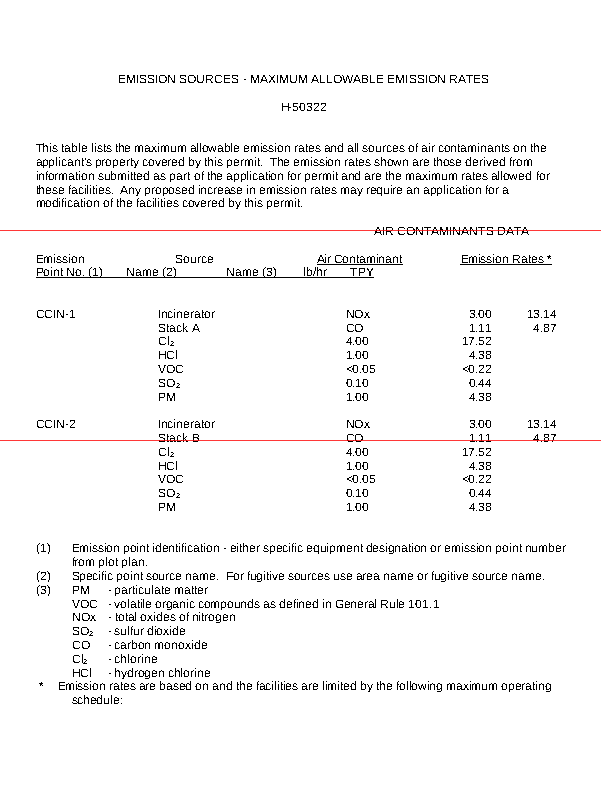

In [76]:
im = p0.to_image()
im.draw_line(((0, 230), (600, 230)))
im.draw_line(((0, 440), (600, 440)))


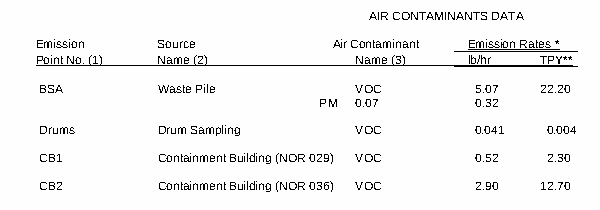

In [61]:
p0_cropped = p0.crop((0, 230, 600, 440))
p0_cropped.to_image()

In [69]:
import pandas as pd
df = pd.DataFrame(
    p0_cropped.extract_table(
        dict(
            vertical_strategy="text", 
            horizontal_strategy="text",
            text_tolerance=5)))

In [70]:
df

,0,1,2,3,4
0,Emission,Source Air C,ontaminant E,m i s s i o n R a t,e s *
1,,,,,
2,Point No. (1),Name (2),Name (3) l b,/ h r,T P Y *
3,,,,,
4,BSA,Waste Pile,VOC,5.07,22.20
5,,PM,0.07,0.32,
6,,,,,
7,Drums,Drum Sampling,VOC,0.041,0.00
8,,,,,
9,CB1,Containment Building (NOR 029),VOC,0.52,2.30
